# Regularization Methods for  Linear Regression

The three main regularization methods for Linear Regression will be demonstrated here:

 - __Ridge Regression__
 - __Least Absolute Shrinkage and Selection Operator (LASSO)__
 - __Elastic Net__
 

### Data Import and Definitions

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df['RM'].values
y = df['MEDV'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None



## Ridge Regression (L2)

__Ridge Regression__ is an L2 penalized model where the loss function is expressed as the following:

$J(w)_{ridge} = \sum_{i=1}^{n}(y^{(i)}-\widehat{y}^{(i)})^{2} + \lambda||w||_{2}^{2}$

__NB: The term $w_{0}$ is not regularized.__

#### Example Code:

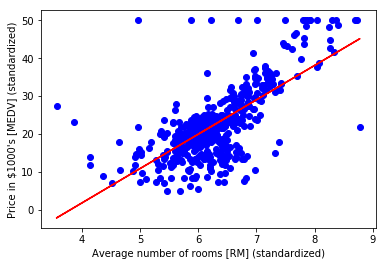

Slope: 9.066
Intercept: -34.442
R^2: 0.484


In [35]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)


model.fit(X,y)

lin_regplot(X, y, model)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

print('Slope: %.3f' % model.coef_[0])
print('Intercept: %.3f' % model.intercept_)

from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(y, model.predict(X)))

## LASSO Regression (L1)

__LASSO Regression__ is an L1 penalized model where the loss function is expressed as the following:

$J(w)_{LASSO} = \sum_{i=1}^{n}(y^{(i)}-\widehat{y}^{(i)})^{2} + \lambda||w||_{1}$


This techinque is a method for producing sparse models and is also a good __supervised feature selection technique__. 

However, if there are $n$ samples and $m$ explanatory variables with $m>n$, then LASSO will only select at most $n$ explanatory variables, which is a drawback.

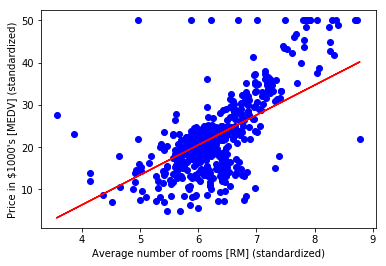

Slope: 7.072
Intercept: -21.915
R^2: 0.459


In [36]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

model.fit(X,y)

lin_regplot(X, y, model)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

print('Slope: %.3f' % model.coef_[0])
print('Intercept: %.3f' % model.intercept_)

from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(y, model.predict(X)))

## ElasticNet Regression (Hybrid)

__ElasticNet Regression__  uses L1 to generate sparse models while also using L2 to overcome the limitations of LASSO.  The loss function is expressed as the following:

$J(w)_{ElasticNet} = \sum_{i=1}^{n}(y^{(i)}-\widehat{y}^{(i)})^{2} + \lambda_{1}||w||_{1}+\lambda||w||_{2}^{2}$


 

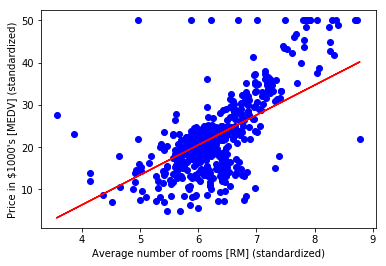

Slope: 7.072
Intercept: -21.915
R^2: 0.459


In [37]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1.0, l1_ratio=0.5)

model.fit(X,y)

lin_regplot(X, y, model)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

print('Slope: %.3f' % model.coef_[0])
print('Intercept: %.3f' % model.intercept_)

from sklearn.metrics import r2_score
print('R^2: %.3f' % r2_score(y, model.predict(X)))

### Further Reading:

[1] https://scikit-learn.org/stable/modules/linear_model.html